In [363]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
import os

In [364]:
# import weather
weather = pd.read_csv("weather_v2.csv")
weather.head()

C:\Users\lonj7\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


area          datetime  temp  temp_QCFlag  prec  prec_QCFlag   ws  \
0   184  2018-02-01 01:00   4.7          0.0   NaN          NaN  3.6   
1   184  2018-02-01 02:00   4.8          0.0   NaN          NaN  2.6   
2   184  2018-02-01 03:00   4.8          0.0   NaN          NaN  4.6   
3   184  2018-02-01 04:00   4.5          0.0   NaN          NaN  5.7   
4   184  2018-02-01 05:00   4.5          0.0   NaN          9.0  4.4   

   ws_QCFlag     wd  wd_QCFlag  ...     vis  sfctype  weathernumber  sfctemp  \
0        0.0   20.0        0.0  ...  1950.0      NaN            NaN      2.9   
1        0.0  360.0        0.0  ...  1865.0      NaN            NaN      2.9   
2        0.0   20.0        0.0  ...  1855.0      NaN            NaN      3.0   
3        0.0   20.0        0.0  ...  1425.0      NaN            NaN      3.0   
4        0.0   20.0        0.0  ...  1043.0      NaN            1.0      3.0   

   sfctemp_QCFlag  landtemp_5cm  landtemp_10cm  landtemp_20cm  landtemp_30cm  \
0             0.0           3.7            3.9            4.2            4.9   
1             0.0           3.6            3.8            4.2            4.9   
2             0.0           3.6            3.8            4.3            4.9   
3             0.0           3.6            3.8            4.2            5.0   
4             0.0           3.5            3.8            4.2            4.9   

   station  
0     ASOS  
1     ASOS  
2     ASOS  
3     ASOS  
4     ASOS  

[5 rows x 37 columns]

In [365]:
weather.drop(['temp_QCFlag', 'prec_QCFlag',
              'ws_QCFlag', 'wd_QCFlag', 'humid_QCFlag', 
              'landP_QCFlag', 'seaP_QCFlag',
              'suntime_QCFlag', '3hr_snow', 'lowmiddleC',
              'typeC', 'weathernumber', 
              'sfctemp', 'sfctemp_QCFlag', 'landtemp_5cm', 
              'landtemp_10cm', 'landtemp_20cm', 'landtemp_30cm',
              'station', 'rad', 'area'],
            axis=1, inplace=True)

In [366]:
def mmms(df):
    
    index = pd.date_range('2018-02-01', '2020-01-31')
    columns = []
    data = pd.DataFrame(index=index, columns=columns)
    
    df = df.fillna(0)
    features = df.columns[1:-1]
    
    for f in features:
        data["%s_max" %(str(f))] = df[f].resample('d').max()
        data["%s_min" %(str(f))] = df[f].resample('d').min()
        data["%s_mean" %(str(f))] = df[f].resample('d').mean()
        data["%s_sum" %(str(f))] = df[f].resample('d').sum()
    
    return data

In [367]:
weather.datetime = pd.to_datetime(weather['datetime'])
weather_1 = weather.groupby('datetime').mean().fillna(0)

In [368]:
# import hourly smp
hourly_smp = pd.read_csv("hourly_smp_v2.csv")
hourly_smp.head()

datetime     smp
0  2018-02-01 01:00  116.84
1  2018-02-01 02:00  116.84
2  2018-02-01 03:00  116.84
3  2018-02-01 04:00  116.84
4  2018-02-01 05:00  116.84

In [369]:
hourly_smp['datetime'] = hourly_smp['datetime'].str.replace('24:00', '0:00')

hourly_smp.index = pd.to_datetime(hourly_smp['datetime'])
hourly_smp.drop("datetime", axis=1, inplace=True)
hourly_smp.head()

smp
datetime                   
2018-02-01 01:00:00  116.84
2018-02-01 02:00:00  116.84
2018-02-01 03:00:00  116.84
2018-02-01 04:00:00  116.84
2018-02-01 05:00:00  116.84

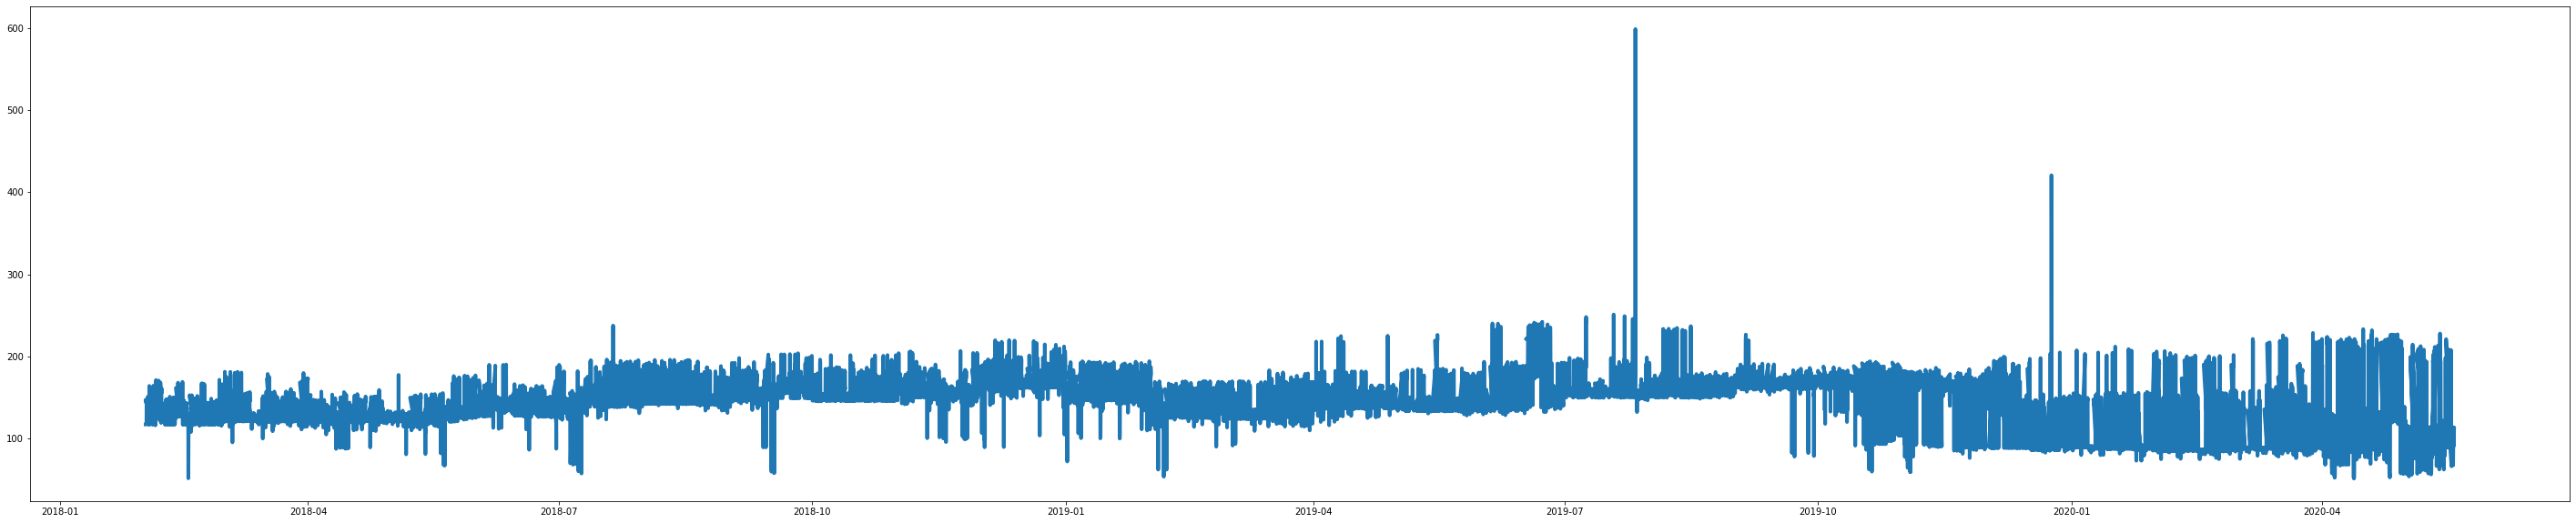

In [370]:
plt.plot(hourly_smp)
plt.rcParams["figure.figsize"] = (50,20)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.color'] = 'r'
plt.show()

# we can see two bumped points

In [371]:
hourly_smp.loc['2019-07-26 18:00:00'] = hourly_smp.loc['2019-07-26 17:00:00']
hourly_smp.loc['2019-12-24 18:00:00'] = hourly_smp.loc['2019-12-24 17:00:00']

In [372]:
print(weather_1.shape)

(20110, 15)


In [373]:
def lag_data(df):
    
    columns = df.columns
    
    for feature in columns:
        for num in np.arange(1,4):
            name = str(feature) + "_lag_" + str(num)
            df[name] = df[feature].shift(num)
    
    return df

In [374]:
weather_1 = lag_data(weather_1)
weather_1

temp      prec        ws          wd      humid  \
datetime                                                                    
2018-02-01 01:00:00   0.745946  0.030303  2.894444  157.294444  75.324242   
2018-02-01 02:00:00   0.610811  0.000000  2.630556  152.016667  74.924242   
2018-02-01 03:00:00   0.624324  0.000000  2.894444  168.863889  74.857576   
2018-02-01 04:00:00   0.600000  0.000000  3.122857  196.191429  76.915152   
2018-02-01 05:00:00   0.621622  0.030303  3.088889  139.502778  77.836364   
...                        ...       ...       ...         ...        ...   
2020-05-18 19:00:00  16.742105  0.323684  3.794595  232.756757  96.594286   
2020-05-18 20:00:00  15.021053  0.321053  4.808108  252.908108  94.822857   
2020-05-18 21:00:00  14.084211  0.014706  4.808108  241.200000  89.038235   
2020-05-18 22:00:00  13.226316  0.000000  4.959459  239.851351  81.497059   
2020-05-18 23:00:00  13.060526  0.000000  4.718919  255.327027  73.026471   

                     vaporP     dew       landP         seaP  suntime  ...  \
datetime                                                               ...   
2018-02-01 01:00:00   5.600  -1.400  977.194118  1028.829412      0.0  ...   
2018-02-01 02:00:00   5.650  -1.275  977.041176  1028.658824      0.0  ...   
2018-02-01 03:00:00   5.600  -1.400  976.894118  1028.517647      0.0  ...   
2018-02-01 04:00:00   5.650  -1.150  976.570588  1028.158824      0.0  ...   
2018-02-01 05:00:00   5.550  -1.350  976.582353  1028.158824      0.0  ...   
...                     ...     ...         ...          ...      ...  ...   
2020-05-18 19:00:00  19.775  17.275  959.900000  1000.642105      0.0  ...   
2020-05-18 20:00:00  18.825  16.450  960.694737  1001.921053      0.0  ...   
2020-05-18 21:00:00  17.225  15.000  961.389474  1003.100000      0.0  ...   
2020-05-18 22:00:00  15.100  12.750  961.894737  1003.831579      0.0  ...   
2020-05-18 23:00:00  13.900  11.300  962.047368  1003.952632      0.0  ...   

                     C_lag_3  ceiling_lag_1  ceiling_lag_2  ceiling_lag_3  \
datetime                                                                    
2018-02-01 01:00:00      NaN            NaN            NaN            NaN   
2018-02-01 02:00:00      NaN      12.000000            NaN            NaN   
2018-02-01 03:00:00      NaN       0.000000      12.000000            NaN   
2018-02-01 04:00:00     0.00      11.000000       0.000000      12.000000   
2018-02-01 05:00:00     0.00       9.000000      11.000000       0.000000   
...                      ...            ...            ...            ...   
2020-05-18 19:00:00     8.25       6.666667       9.500000      10.000000   
2020-05-18 20:00:00     9.00       4.666667       6.666667       9.500000   
2020-05-18 21:00:00     8.50       5.750000       4.666667       6.666667   
2020-05-18 22:00:00     7.75       6.250000       5.750000       4.666667   
2020-05-18 23:00:00     7.25       2.000000       6.250000       5.750000   

                     vis_lag_1  vis_lag_2  vis_lag_3  sfctype_lag_1  \
datetime                                                              
2018-02-01 01:00:00        NaN        NaN        NaN            NaN   
2018-02-01 02:00:00    1902.75        NaN        NaN            0.0   
2018-02-01 03:00:00    1829.25    1902.75        NaN            0.0   
2018-02-01 04:00:00    1799.25    1829.25    1902.75            0.0   
2018-02-01 05:00:00    1442.50    1799.25    1829.25            0.0   
...                        ...        ...        ...            ...   
2020-05-18 19:00:00     759.00     565.50     681.00            0.0   
2020-05-18 20:00:00     723.75     759.00     565.50            0.0   
2020-05-18 21:00:00    1953.75     723.75     759.00            0.0   
2020-05-18 22:00:00    1655.50    1953.75     723.75            0.0   
2020-05-18 23:00:00    1967.50    1655.50    1953.75            0.0   

                     sfctype_lag_2  sfctype_lag_3  
datetime                       

In [375]:
weather_1.shape

(20110, 60)

In [376]:
weahter_1['year'] = weather_1.index.year
weather_1['month'] = weather_1.index.month
weather_1['day'] = weather_1.index.day
weather_1['hour'] = weather_1.index.hour

NameError: name 'weahter_1' is not defined

In [377]:
data = pd.concat([weather_1, hourly_smp], axis=1, sort=False).fillna(method='backfill')
data.head()

temp      prec        ws          wd      humid  \
datetime                                                                   
2018-02-01 00:00:00  0.745946  0.030303  2.894444  157.294444  75.324242   
2018-02-01 01:00:00  0.745946  0.030303  2.894444  157.294444  75.324242   
2018-02-01 02:00:00  0.610811  0.000000  2.630556  152.016667  74.924242   
2018-02-01 03:00:00  0.624324  0.000000  2.894444  168.863889  74.857576   
2018-02-01 04:00:00  0.600000  0.000000  3.122857  196.191429  76.915152   

                     vaporP    dew       landP         seaP  suntime  ...  \
datetime                                                              ...   
2018-02-01 00:00:00    5.60 -1.400  977.194118  1028.829412      0.0  ...   
2018-02-01 01:00:00    5.60 -1.400  977.194118  1028.829412      0.0  ...   
2018-02-01 02:00:00    5.65 -1.275  977.041176  1028.658824      0.0  ...   
2018-02-01 03:00:00    5.60 -1.400  976.894118  1028.517647      0.0  ...   
2018-02-01 04:00:00    5.65 -1.150  976.570588  1028.158824      0.0  ...   

                     ceiling_lag_1  ceiling_lag_2  ceiling_lag_3  vis_lag_1  \
datetime                                                                      
2018-02-01 00:00:00           12.0           12.0           12.0    1902.75   
2018-02-01 01:00:00           12.0           12.0           12.0    1902.75   
2018-02-01 02:00:00           12.0           12.0           12.0    1902.75   
2018-02-01 03:00:00            0.0           12.0           12.0    1829.25   
2018-02-01 04:00:00           11.0            0.0           12.0    1799.25   

                     vis_lag_2  vis_lag_3  sfctype_lag_1  sfctype_lag_2  \
datetime                                                                  
2018-02-01 00:00:00    1902.75    1902.75            0.0            0.0   
2018-02-01 01:00:00    1902.75    1902.75            0.0            0.0   
2018-02-01 02:00:00    1902.75    1902.75            0.0            0.0   
2018-02-01 03:00:00    1902.75    1902.75            0.0            0.0   
2018-02-01 04:00:00    1829.25    1902.75            0.0            0.0   

                     sfctype_lag_3     smp  
datetime                                    
2018-02-01 00:00:00            0.0  146.87  
2018-02-01 01:00:00            0.0  116.84  
2018-02-01 02:00:00            0.0  116.84  
2018-02-01 03:00:00            0.0  116.84  
2018-02-01 04:00:00            0.0  116.84  

[5 rows x 61 columns]

In [378]:
# XG boost for feature extraction
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [379]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

data_dmatrix = xgb.DMatrix(data=X, label=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [380]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.5,
                max_depth = 10, alpha = 10, n_estimators = 100)

xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

In [381]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE supply: %f" % (rmse))

RMSE supply: 45.698989


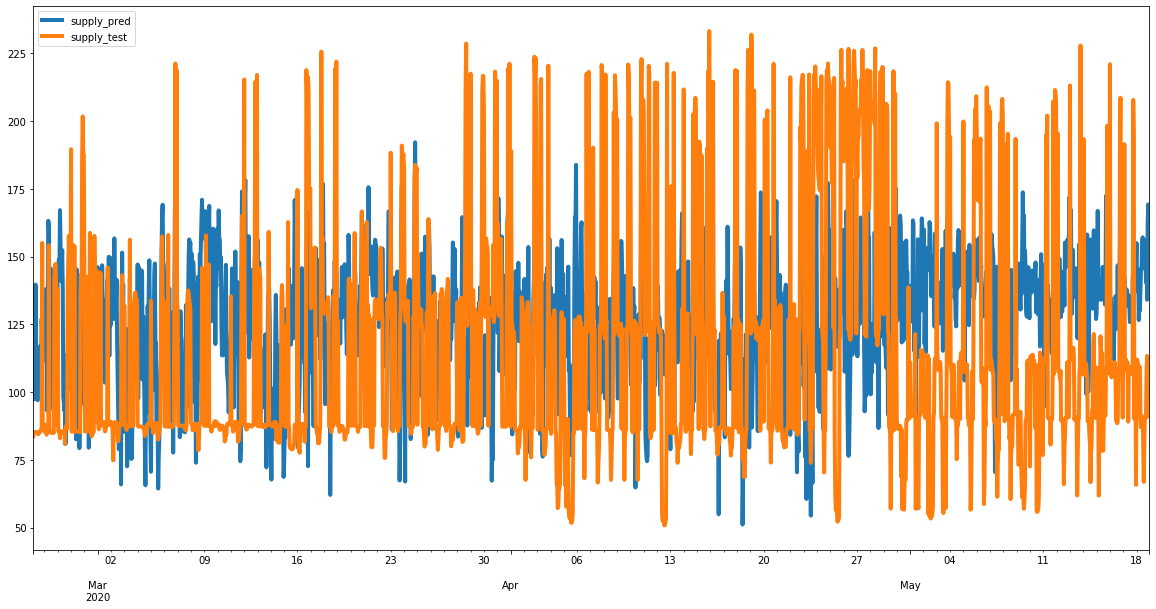

In [382]:
index = pd.date_range(y_test.index[0], y_test.index[-1], freq='H')
columns = []

smp_supply_pred = pd.DataFrame(index=index, columns=columns)
smp_supply_pred['supply_pred'] = preds
smp_supply_pred['supply_test'] = y_test

smp_supply_pred.plot(figsize=(20,10))

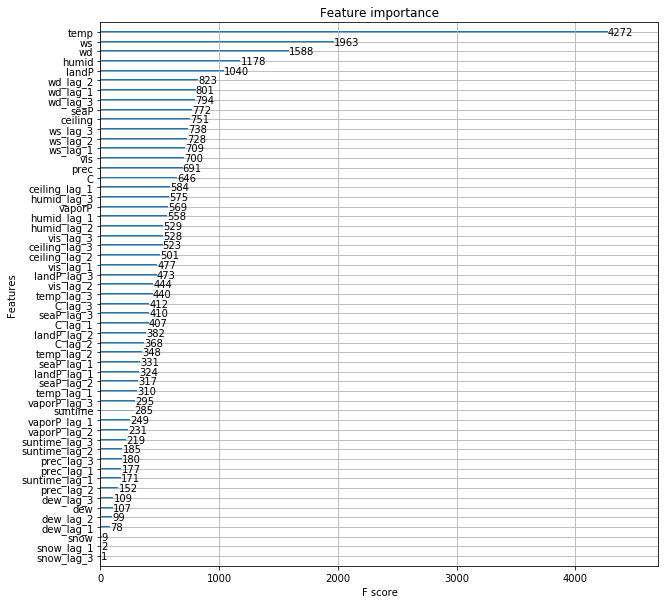

In [385]:
import matplotlib.pyplot as plt

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

In [386]:
importance = xg_reg.get_booster().get_score(importance_type='weight')

importance_df = pd.DataFrame([importance]).T.sort_values(by=0, ascending=False)

features = importance_df[importance_df[0] >= 1900]
features.head()

0
temp  4272
ws    1963

In [387]:
data_1 = data[features.index].copy()
data_1['year'] = data_1.index.year
data_1['month'] = data_1.index.month
data_1['day'] = data_1.index.day
data_1['hour'] = data_1.index.hour
data_1['smp'] = data.smp

In [388]:
data_1.head()

temp        ws  year  month  day  hour     smp
datetime                                                               
2018-02-01 00:00:00  0.745946  2.894444  2018      2    1     0  146.87
2018-02-01 01:00:00  0.745946  2.894444  2018      2    1     1  116.84
2018-02-01 02:00:00  0.610811  2.630556  2018      2    1     2  116.84
2018-02-01 03:00:00  0.624324  2.894444  2018      2    1     3  116.84
2018-02-01 04:00:00  0.600000  3.122857  2018      2    1     4  116.84

In [389]:
X, y = data_1.iloc[:, :-1], data_1.iloc[:, -1]

data_dmatrix = xgb.DMatrix(data=X, label=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [392]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.5,
                max_depth = 10, alpha = 10, n_estimators = 200)

xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

In [393]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE supply: %f" % (rmse))

RMSE supply: 43.802340


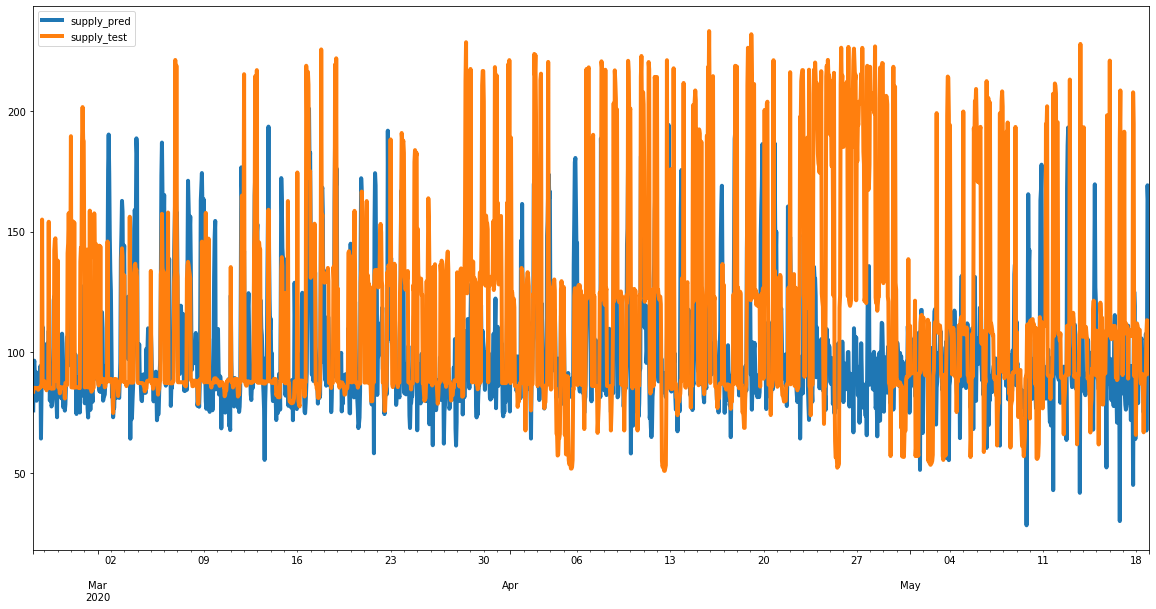

In [394]:
index = pd.date_range(y_test.index[0], y_test.index[-1], freq='H')
columns = []

smp_supply_pred = pd.DataFrame(index=index, columns=columns)
smp_supply_pred['supply_pred'] = preds
smp_supply_pred['supply_test'] = y_test

smp_supply_pred.plot(figsize=(20,10))

In [353]:
features = data_1.iloc[:, :-1]
target = data_1.iloc[:, -1]
features.head()

temp        ws          wd      humid       landP  \
datetime                                                                     
2018-02-01 00:00:00  0.745946  2.894444  157.294444  75.324242  977.194118   
2018-02-01 01:00:00  0.745946  2.894444  157.294444  75.324242  977.194118   
2018-02-01 02:00:00  0.610811  2.630556  152.016667  74.924242  977.041176   
2018-02-01 03:00:00  0.624324  2.894444  168.863889  74.857576  976.894118   
2018-02-01 04:00:00  0.600000  3.122857  196.191429  76.915152  976.570588   

                       wd_lag_2    wd_lag_1    wd_lag_3         seaP  ceiling  \
datetime                                                                        
2018-02-01 00:00:00  157.294444  157.294444  157.294444  1028.829412     12.0   
2018-02-01 01:00:00  157.294444  157.294444  157.294444  1028.829412     12.0   
2018-02-01 02:00:00  157.294444  157.294444  157.294444  1028.658824      0.0   
2018-02-01 03:00:00  157.294444  152.016667  157.294444  1028.517647     11.0   
2018-02-01 04:00:00  152.016667  168.863889  157.294444  1028.158824      9.0   

                     ws_lag_3  ws_lag_2  ws_lag_1  year  month  day  hour  
datetime                                                                   
2018-02-01 00:00:00  2.894444  2.894444  2.894444  2018      2    1     0  
2018-02-01 01:00:00  2.894444  2.894444  2.894444  2018      2    1     1  
2018-02-01 02:00:00  2.894444  2.894444  2.894444  2018      2    1     2  
2018-02-01 03:00:00  2.894444  2.894444  2.630556  2018      2    1     3  
2018-02-01 04:00:00  2.894444  2.630556  2.894444  2018      2    1     4

In [354]:
dataset = features.values

In [344]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [345]:
len(data)

20112

In [355]:
TRAIN_SPLIT=18000
past_history = 2000
future_target = 700
STEP = 6

x_train_single, y_train_single = multivariate_data(dataset, target, 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, target,
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [356]:
print ('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (334, 17)


In [357]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [358]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [359]:
for x, y in val_data_single.take(1):
    print(single_step_model.predict(x).shape)

In [361]:
single_step_model.predict(x).shape

(256, 1)

In [318]:
future_target = 700
past_history = 2000
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target temperature to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (334, 17)

 Target temperature to predict : (700,)


In [327]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [328]:
def create_time_steps(length):
  return list(range(-length, 0))

def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, 1]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

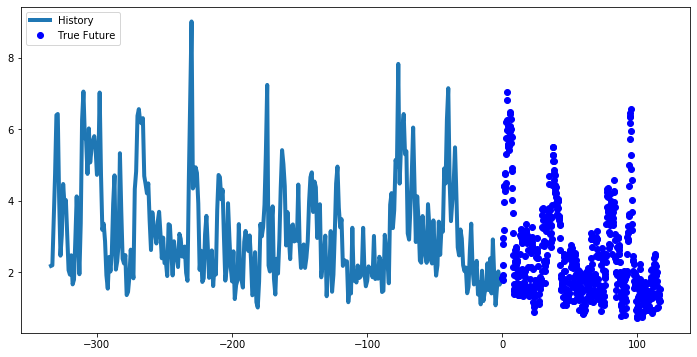

In [329]:
for x, y in train_data_multi.take(1):
  multi_step_plot(x[0], y[0], np.array([0]))

In [330]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(72))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [332]:
for x, y in val_data_multi.take(1):
  print (multi_step_model.predict(x).shape)

In [326]:
EPOCHS = 10
EVALUATION_INTERVAL = 200
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

ValueError: in converted code:

    C:\Users\lonj7\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py:677 map_fn
        batch_size=None)
    C:\Users\lonj7\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training.py:2410 _standardize_tensors
        exception_prefix='input')
    C:\Users\lonj7\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training_utils.py:573 standardize_input_data
        'with shape ' + str(data_shape))

    ValueError: Error when checking input: expected lstm_input to have 3 dimensions, but got array with shape (None, 1)
